## Notebook Imports and Packages.

In [89]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Example 1
### $$f(x) = x^2 + x + 1$$

In [90]:
def f(x):
    return x**2 + x + 1

In [91]:
x_1 = np.linspace(start=-3, stop=3, num=500)

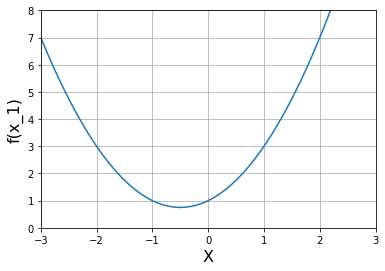

In [92]:
# plot
plt.xlim([-3, 3])
plt.xlabel("X", fontsize=16)
plt.ylim([0, 8])
plt.ylabel("f(x_1)", fontsize=16) 
plt.plot(x_1, f(x_1))
plt.grid()
plt.show()

## Slope & Derivative


In [93]:
def df(x):
    return 2*x +1

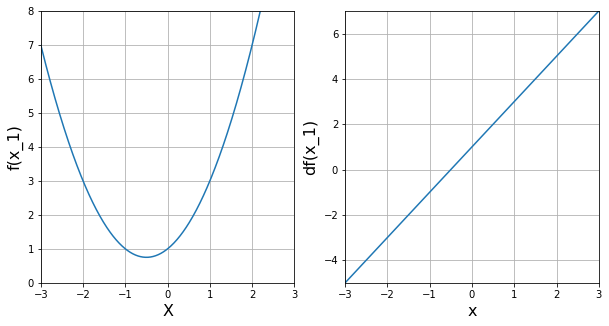

In [126]:
plt.figure(figsize=[10, 5])

# plot 1
plt.subplot(1, 2, 1)
plt.xlim([-3, 3])
plt.xlabel("X", fontsize=16)
plt.ylim([0, 8])
plt.ylabel("f(x_1)", fontsize=16) 
plt.plot(x_1, f(x_1))
plt.grid()


#plot 2
plt.subplot(1, 2, 2)
plt.xlim([-3, 3])
plt.xlabel("x", fontsize=16)
plt.ylim([-5, 7])
plt.ylabel("df(x_1)", fontsize=16) 
plt.plot(x_1, df(x_1))
plt.grid()
plt.show()



In [128]:
# gradient descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001
x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500): 
    previous_x = new_x
    gradient = df(previous_x)
    new_x =  previous_x - step_multiplier * gradient
    step_size = abs(new_x - previous_x)
    x_list.append(new_x)
    slope_list.append(df)
    if step_size < precision:
        print('loop ran :', n)
        break
    
print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is :', f(new_x))

loop ran : 50
Local minimum occurs at: -0.49996003706460423
Slope or df(x) value at this point is: 7.992587079153068e-05
f(x) value or cost at this point is : 0.7500000015970362


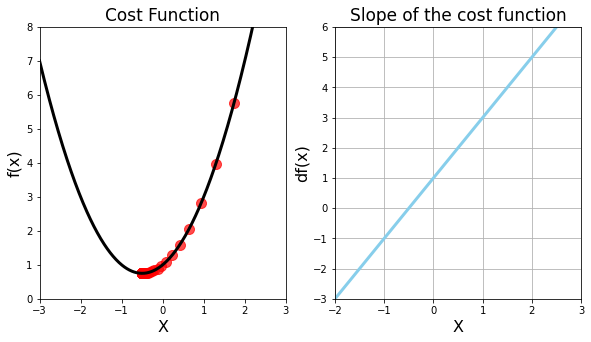

In [112]:
plt.figure(figsize=[15, 5])

plt.subplot(1, 3, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

values = np.array(x_list)
plt.plot(x_1, f(x_1), color='black', linewidth=3)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.7)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=3)


# Example 2 - Multiple Minima vs Initial Guess & Adanced Function
## $$ g(x) = x^4 - 4x^2 + 5 $$

In [114]:
# Make some data 
x_2 = np.linspace(-2, 2, 1000)

# Challenge: Write the g(x) function and the dg(x) function in Python?
def g(x):
    return x**4 - 4*x**2 + 5
def dg(x):
    return 4*x**3 - 8*x

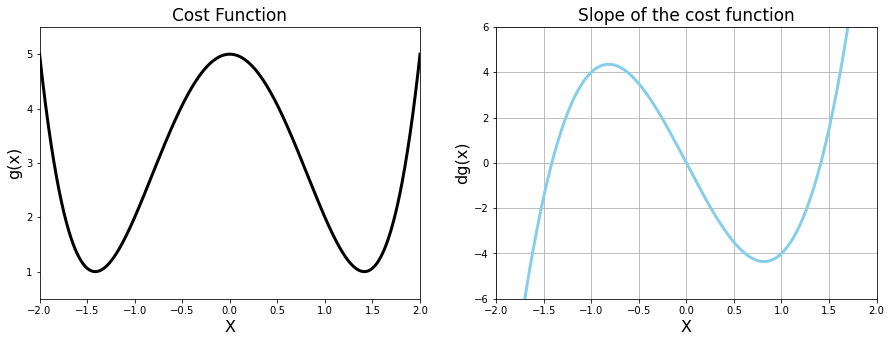

In [124]:
plt.figure(figsize=[15, 5])

plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

values = np.array(x_list)
plt.plot(x_2, g(x_2), color='black', linewidth=3)


# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 6)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=3)


## Gradeint Descent as a Python Function.

In [209]:
# gradient descent
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iter=300):
    

    new_x = initial_guess

    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter): 
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x =  previous_x - multiplier * gradient
        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        if step_size < precision:
            print('loop ran :', n)
            break
    return new_x, x_list, slope_list 

In [200]:
local_min, list_x , deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))
print(deriv_list)

loop ran : 21
Local min occurs at: 1.4122375085019094
Number of steps: 23
[-3.5, -3.8192280000000003, -4.090804992865673, -4.28101536091076, -4.354578365531026, -4.282421444451021, -4.051598563176713, -3.6735673285555963, -3.1857250720349457, -2.6433236120211516, -2.104434974726992, -1.6152659372766287, -1.202412537744527, -0.873464804002376, -0.6227248545552868, -0.4378278315755093, -0.3047432723604011, -0.21059778304298504, -0.14480757312219872, -0.09922306419313287, -0.06782466501976359, -0.04628538792876746, -0.03155062633818417]


loop ran : 32


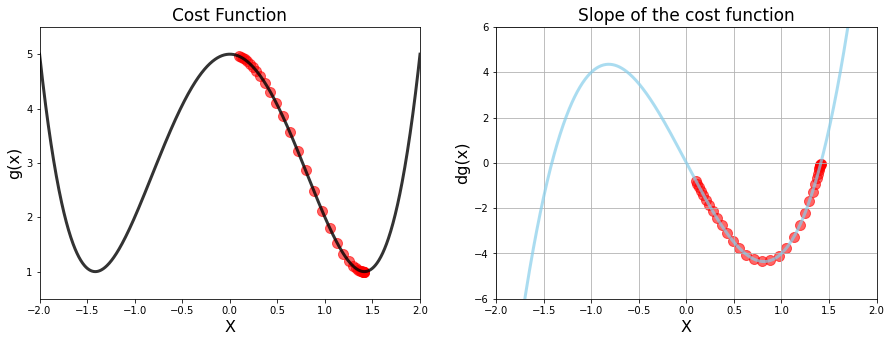

In [201]:

# calling gradient function.
local_min, list_x , deriv_list = gradient_descent(dg, 0.1)
plt.figure(figsize=[15, 5])

# graph 1 chart 
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

values = np.array(x_list)
plt.plot(x_2, g(x_2), color='black', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 6)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=3, alpha=0.7)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.6) 


# Example 3 - Divergence, Overflow and Python Tuples
## $$ h(x) = x^5 - 2x^4 + 2 $$

In [202]:
# Make Data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2
def dh(x):
    return 5*x**4 - 8*x**3

Local min occurs at: -2071072.4470816324
Cost at this minimum is : -3.810455326061589e+31
Number of steps: 71


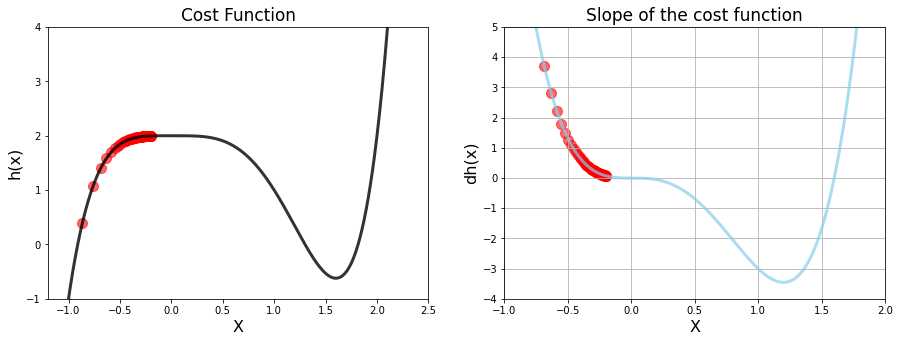

In [215]:

# calling gradient function.
local_min, list_x , deriv_list = gradient_descent(dh,initial_guess= -0.2, max_iter=70)
plt.figure(figsize=[15, 5])

# graph 1 chart 
plt.subplot(1, 2, 1)

plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)

values = np.array(x_list)
plt.plot(x_3, h(x_3), color='black', linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.grid()
plt.xlim(-1, 2)
plt.ylim(-4, 5)

plt.plot(x_3, dh(x_3), color='skyblue', linewidth=3, alpha=0.7)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.6) 

print('Local min occurs at:', local_min)
print('Cost at this minimum is :', h(local_min))
print('Number of steps:', len(list_x))

In [219]:
import sys
sys.version
sys.float_info.max

1.7976931348623157e+308

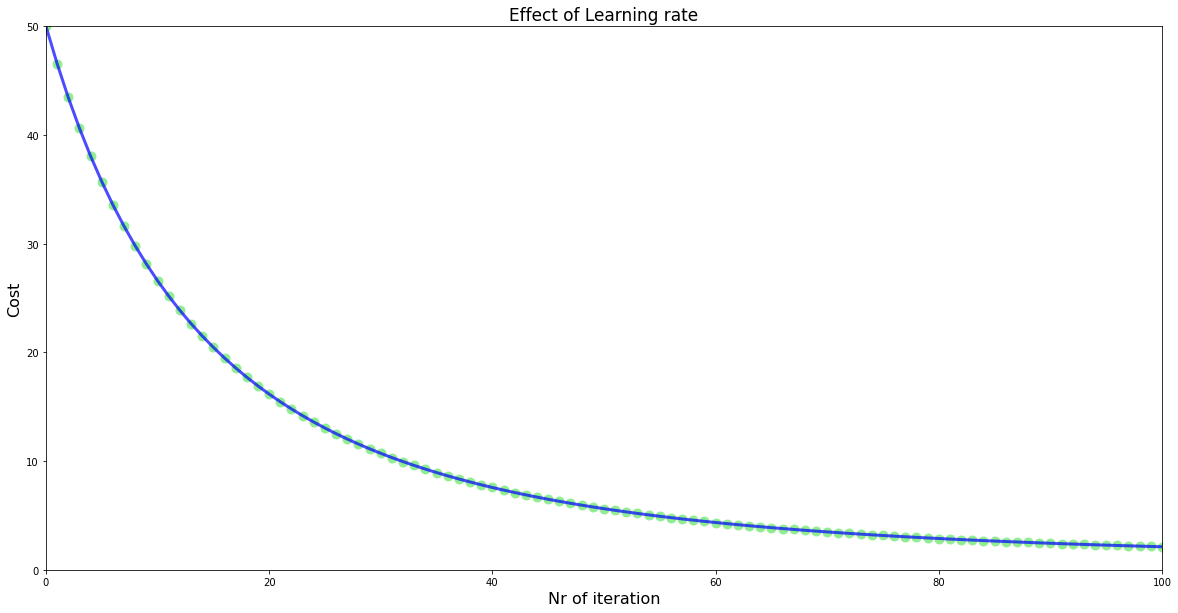

In [240]:
# calling gradient function.
n = 100
low_gamma = gradient_descent(dg, initial_guess= 3, multiplier=0.0005 , max_iter=n, precision=0.0001)
plt.figure(figsize=[20, 10])

# Plotting reduction in cost for each iteration.

plt.xlim(0, n)
plt.ylim( 0, 50)

plt.title('Effect of Learning rate', fontsize=17)
plt.xlabel('Nr of iteration', fontsize=16)
plt.ylabel('Cost', fontsize=16)

# Values for our charts 
# 1) Y Axis Data convert the list to numpy arrays
low_values = np.array(low_gamma[1])

# 2) X Axis Data Create a list from 0 to n+1 
iteration_list = list(range(0, n+1))

plt.plot(iteration_list, g(low_values), color='blue', linewidth= 3, alpha=0.7,)
plt.scatter(iteration_list, g(low_values), color='blue', s=80)

